In [1]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [30]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
tesla=yf.Ticker("TSLA")
tesla_data=tesla.history(period="max")
tesla_df=tesla_data

In [4]:
tesla_df.reset_index(inplace=True)
tesla_df.tail()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
3176,2023-02-09 00:00:00-05:00,207.779999,214.000000,204.770004,207.320007,215431400,0.0,0.0
3177,2023-02-10 00:00:00-05:00,202.229996,206.199997,192.889999,196.889999,204193800,0.0,0.0
3178,2023-02-13 00:00:00-05:00,194.419998,196.300003,187.610001,194.639999,172475500,0.0,0.0
3179,2023-02-14 00:00:00-05:00,191.940002,209.820007,189.440002,209.250000,216455700,0.0,0.0
3180,2023-02-15 00:00:00-05:00,211.759995,214.660004,206.110001,214.240005,181006400,0.0,0.0


In [6]:
tesla_df.dtypes

Date            datetime64[ns, America/New_York]
Open                                     float64
High                                     float64
Low                                      float64
Close                                    float64
Volume                                     int64
Dividends                                float64
Stock Splits                             float64
dtype: object

In [8]:
tesla_df.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,3181.000000,3181.000000,3181.000000,3181.000000,3.181000e+03,3181.0,3181.000000
mean,59.791253,61.150797,58.308321,59.761833,9.460217e+07,0.0,0.002515
std,95.712441,97.933486,93.228132,95.607934,8.198645e+07,0.0,0.103371
min,1.076000,1.108667,0.998667,1.053333,1.777500e+06,0.0,0.000000
25%,9.261333,9.491333,8.956667,9.200000,4.265400e+07,0.0,0.000000
50%,16.353333,16.562000,16.091999,16.326668,7.635150e+07,0.0,0.000000
75%,25.496668,26.348000,25.178667,25.666668,1.191135e+08,0.0,0.000000
max,411.470001,414.496674,405.666656,409.970001,9.140820e+08,0.0,5.000000


In [9]:
tesla_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3181 entries, 0 to 3180
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype                           
---  ------        --------------  -----                           
 0   Date          3181 non-null   datetime64[ns, America/New_York]
 1   Open          3181 non-null   float64                         
 2   High          3181 non-null   float64                         
 3   Low           3181 non-null   float64                         
 4   Close         3181 non-null   float64                         
 5   Volume        3181 non-null   int64                           
 6   Dividends     3181 non-null   float64                         
 7   Stock Splits  3181 non-null   float64                         
dtypes: datetime64[ns, America/New_York](1), float64(6), int64(1)
memory usage: 198.9 KB


In [10]:
tesla_df.isnull().sum()

Date            0
Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64

In [11]:
x=tesla_df[["Open","High","Low","Volume"]].values
y=tesla_df["Close"].values

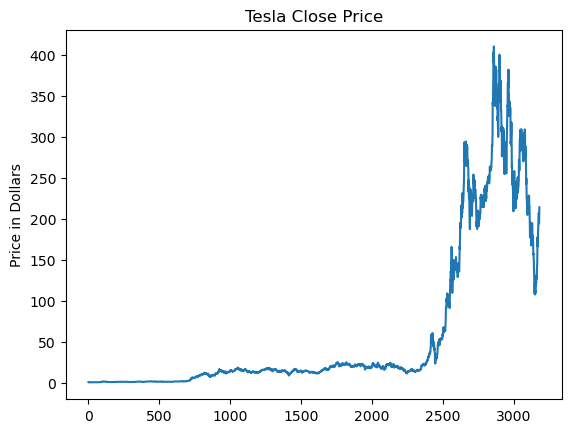

In [26]:
plt.plot(y)
plt.title('Tesla Close Price')
plt.ylabel('Price in Dollars')
plt.show()

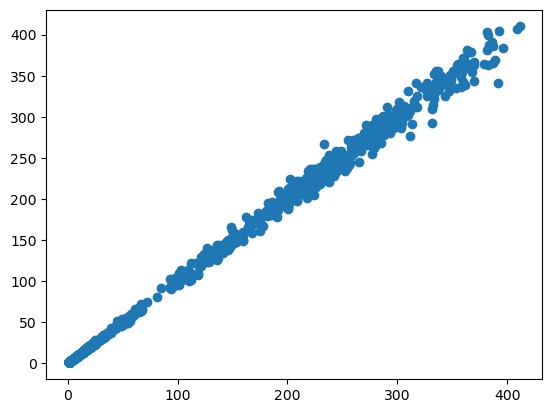

In [33]:
X=tesla_df["Open"]
plt.scatter(X,y)

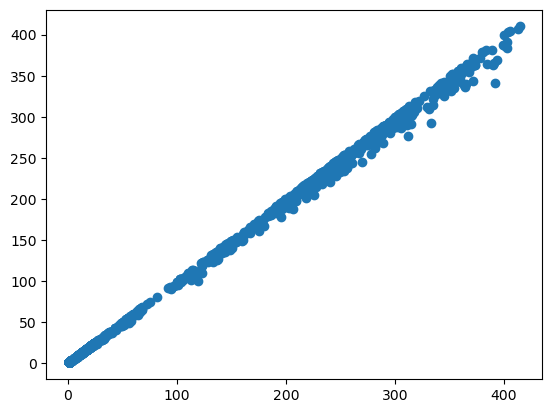

In [34]:
X=tesla_df["High"]
plt.scatter(X,y)

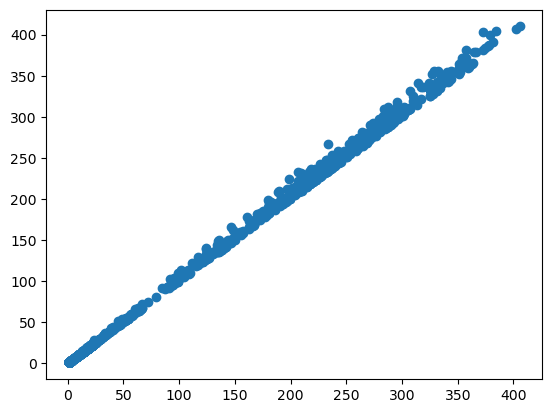

In [35]:
X=tesla_df["Low"]
plt.scatter(X,y)

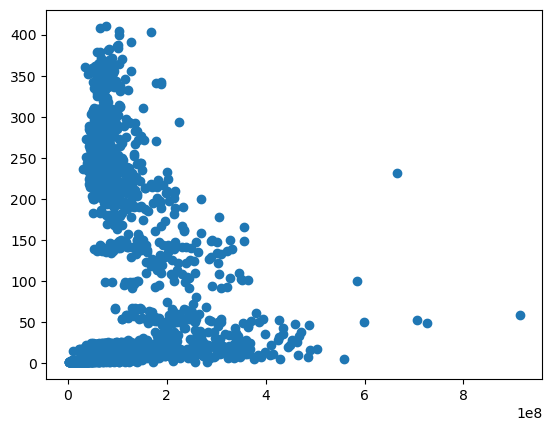

In [36]:
X=tesla_df["Volume"]
plt.scatter(X,y)

/opt/conda/envs/Python-3.10/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(0.0, 432.5122930625536)

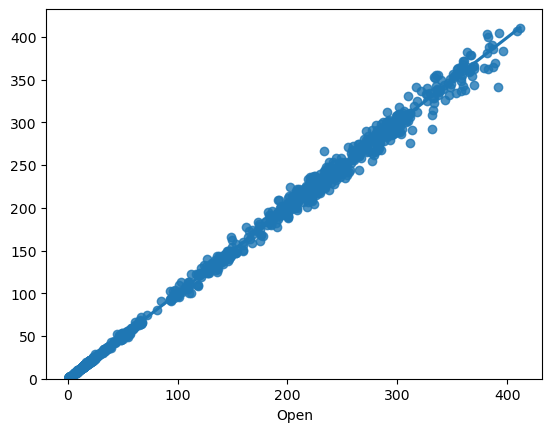

In [37]:
sb.regplot(tesla_df["Open"],y,data=tesla_df)
plt.ylim(0,)

In [12]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [13]:
lr_model=LinearRegression()
lr_model.fit(x_train,y_train)

LinearRegression()

In [14]:
y_pred=lr_model.predict(x_test)

In [15]:
rmse=np.sqrt(mean_squared_error(y_test,y_pred))
r2=r2_score(y_test,y_pred)
print("RMSE:{:.2f}".format(rmse))
print("R^2:{:.2f}".format(r2))

RMSE:1.46
R^2:1.00


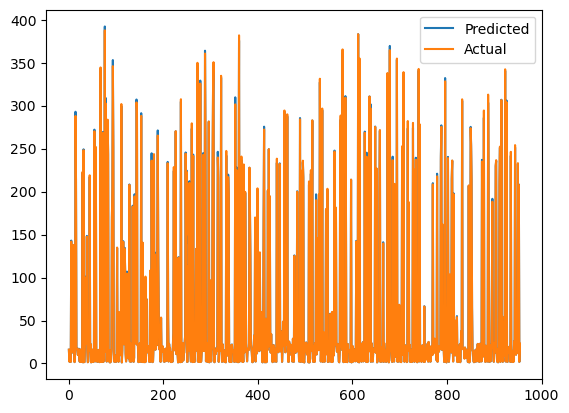

In [16]:
plt.plot(y_pred,label="Predicted")
plt.plot(y_test,label="Actual")
plt.legend()
plt.show()

In [17]:
future_data = [[680.76, 688.37, 672.40, 14299700],
               [697.00, 697.00, 667.75, 23131800],
               [682.80, 684.75, 657.51, 17346500]]

In [18]:
future_pred = lr_model.predict(future_data)
print('Predicted future stock prices:', future_pred)

Predicted future stock prices: [680.20226422 672.36403852 663.16503059]
